### A simple perceptron network 
XOR example taken from "Learning Deep Learning by Magnus Ekman" pp.137

Manually implement feedforward network and backpropagation using Numpy

- number of inputs = 2
- layer 1 = 2 neurons, activation = tanh
- layer 2 = 1 neuron, activation = sigmoid

<img src="xor_network.png" />

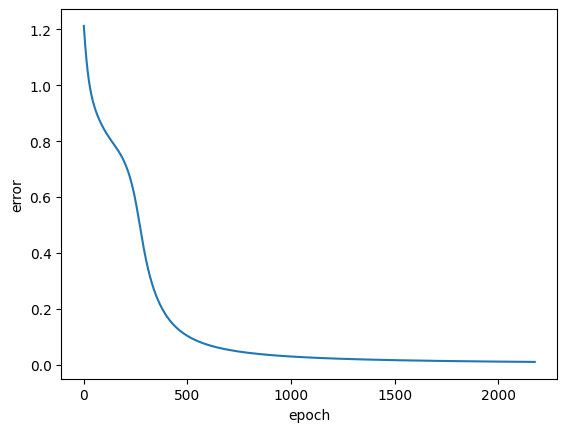

0.0 [0.04106444]
1.0 [0.94217349]
1.0 [0.94275004]
0.0 [0.04111556]
error = [0.00999824]
**************************************************
weight_1 = [[ 1.74360202 -1.7416744 ]
 [ 1.9269204  -1.92222012]]
weight_2 = [-3.26747285  3.25485957]
bias_1 = [2.91463002]
bias_2 = [2.91463002]


In [237]:
# A network of 2+1 neurons and 2 inputs to solve the XOR problem
import numpy as np 
import matplotlib.pyplot as plt

rg = np.random.default_rng(4)
LEARNING_RATE = 0.1

# x[i] has dimension (2,)
x_train = np.array([[-1.0, -1.0], 
                    [-1.0, 1.0],
                    [1.0, -1.0],
                    [1.0, 1.0]])

y_train = np.array([0.0, 1.0, 1.0, 0.0]) # train data labels
weight_1 = rg.uniform(-1.0, 1.0, (2,2))  #dimension = (2,2)
weight_2 = rg.uniform(-1.0, 1.0, (2,))   #dimension = (2,1)
bias_1 = rg.uniform(-1.0, 1.0, (2,))     #dimension = (2,)
bias_2 = rg.uniform(-1.0, 1.0, (1,))     #dimension = (1,)

# trained weights solution
# weight_1 = np.array([[0.77, 0.76],
#                      [-0.58, -0.56]])
# weight_2 = np.array([1.01, 0.89])
# bias_1 = np.array([0.70, 0.40])
# bias_2 = np.array([-0.43])

y1, yf = None, None
def forward(x):
    global y1, yf
    # output of the first layer of neurons 
    # y1 = tanh (w1.x[i] + b1) 
    # dimension y1 = (2,2).(2,) + (2,) = (2,)
    y1 = np.tanh(weight_1 @ x + bias_1)

    #compute the output of the second (final) layer of neuron -> yf
    # yf = sigmoid (w2.y1 + b2)
    # dimension yf = (2,).(2,) + (1,) = (1,)
    z2 = weight_2 @ y1 + bias_2
    yf = 1.0 / (1.0 + np.exp(-z2))

# forward(x_train[0])
# print(f'y1 = {y1}')
# print(f'yf = {yf}')

#compute gradients for all weights and bias
def backward(y_truth, x_input):
    global y1, yf
    global weight_1, weight_2, bias_1, bias_2
    # dE/dy_f
    #print(y_truth, yf)
    error_yf = -(y_truth - yf)          # (1,)
    #print(f'error_yf = {error_yf}')

    # the derivative of a sigmoid function S(x) equals to S(x)*(1-S(x))
    # where y_f is the output of the sigmoid activation function y_f = S(z1), thus
    # dy_f/dz2 = S'(z2) = S(z2) * (1 - S(z2)) = y_f * (1 - y_f)
    div_yf = yf * (1 - yf)              # (1,)
    # print(f'div_yf = {div_yf}')

    # the derivative of a tanh function tanh(x) equals to 1 - tanh^2(x)
    # dy1/dz1 at output neurons layer 1
    div_y1 = 1 - y1**2                  # (2,)
    # print(f'div_y1 = {div_y1}')


    # gradient descent - weight adjustment
    # @bias_2 
    # z2 = w2.y1 + b2
    # dE/db2 = dE/dy_f * dy_f/dz2 * dz2/db2  = error_yf * div_yf * 1
    bias_2 -= LEARNING_RATE*error_yf*div_yf     # (1,)
    # print(f'bias_2 = {bias_2}')

    # @bweight_2 
    # dE/dw2 = dE/dy_f * dy_f/dz2 * dz2/dw2 = error_yf * div_yf * y1
    weight_2 -= LEARNING_RATE*error_yf*div_yf*y1    # (2,)
    # print(f'weight_2 = {weight_2}')

    # @bias_1
    # z1 = w1*x + b1
    # dE/db1 = dE/dy_f * dy_f/dz2 * dz2/y1 * dy1/z1 * dz1/db1
    #        = error_yf * div_yf * w2 * div_y1 * 1
    bias_1 -= LEARNING_RATE*error_yf*div_yf*(weight_2 * div_y1)  # (2, )
    # print(f'bias_1 = {bias_1}')

    # @weight_1
    # dE/dw1 = dE/dy_f * dy_f/dz2 * dz2/y1 * dy1/z1 * dz1/dw1
    #        = error_yf * div_yf * w2 * div_y1 * x[i]
    #        = dE/dz1 * x[i] 
    #        = temp * x[i]
    #        = [temp[0]]*[x0, x1], [temp[1]]*[x0, x1]
    temp = error_yf*div_yf*(weight_2 * div_y1)
    weight_1 -= LEARNING_RATE*np.dot(temp.reshape((2,1)), x_input.reshape((1,2)))
    # print(f'weight_1 = {weight_1}')

def train(max_epoch, stop):
    global index 
    index = [0,1,2,3]
    error_plot = []

    for epoch in range(max_epoch):
        np.random.shuffle(index)
        for i in index:
            forward(x_train[i])
            backward(y_train[i], x_train[i])

        success = True
        error = 0.0
        for i in range(len(x_train)):
            forward(x_train[i])
            error += (y_train[i]-yf)**2 
            if ((y_train[i] < 0.5) and (yf < 0.5)) or ((y_train[i] >= 0.5) and (yf > 0.5)):
                continue
            else:
                success = False 
        error_plot.append(error)
 
        if (success == True) and (error <= stop):
            # print(f"error = {error}")
            break
  
    plt.plot(np.arange(epoch+1), np.array(error_plot))
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.show()


train(10000, 0.01)

error = 0.0
for i in range(len(x_train)):
        forward(x_train[i])
        print(y_train[i], yf)
        error += (y_train[i]-yf)**2 
print(f"error = {error}")

print('*'*50)
print(f'weight_1 = {weight_1}')
print(f'weight_2 = {weight_2}')
print(f'bias_1 = {bias_2}')
print(f'bias_2 = {bias_2}')


In [ ]:
# print(x_train[0], x_train.shape)
# print(weight_1, weight_1.shape)
# print(bias_1, bias_1.shape)

# x1 = np.array([0.77, 0.76]) @ np.array([-1.0, -1.0]) + np.array([0.7])
# x2 = np.array([-0.58, -0.56]) @ np.array([-1.0, -1.0]) + np.array([0.4])
# print(x1,x2)
# print(np.tanh(x1), np.tanh(x2))
# x1 = np.tanh(x1)
# x2 = np.tanh(x2)

# print(np.array([x1[0], x2[0]]))

# y = np.dot(np.array([x1[0],x2[0]]), np.array([1.01, 0.89])) - 0.43
# y = 1.0 / (1.0 + np.exp(-y))
# print(y)

# print(x_train[1])
# print(weight_1)
# print(weight_1 @ x_train[1])

# n2 = np.dot(weight_2, n1) + bias_2
# n2 = 1.0 / (1.0 + np.exp(n2))
# print(n2)